In [1]:


import pickle
import numpy as np
#from neuronunit.tests.dynamics import CVTest, LocalVariationTest
!pip install pyspike

import pyspike
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyspike as spk
'''

with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:
  mdf1 = pickle.load(f)


with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf0 = pickle.load(f)
  print(mdf0)
'''
#print(mdf1)
import pyspike as spk
with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:

  #with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf1 = pickle.load(f)#http://0.0.0.0:8888/notebooks/BluePyOpt/Spike_Analysis.ipynb#
  print(mdf1)
vm_size = mdf1.size['analogsignals']
print(mdf1)


    100% |████████████████████████████████| 1.5MB 732kB/s ta 0:00:01
  Running setup.py bdist_wheel for pyspike ... - \ | / - \ | / - \ | done
  Stored in directory: /home/jovyan/.cache/pip/wheels/ff/1b/bb/af24b26b73aaf049b24b587faf0186a1dc32b07f2186e62ca2
Successfully built pyspike


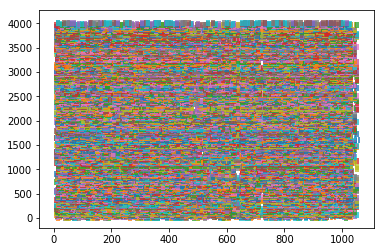

In [2]:
vm_size = mdf1.size['analogsignals']
train_size = mdf1.size['spiketrains']

print(mdf1)
# first load the data, interval ending time = 4000, start=0 (default)
#spike_trains_txt = spk.load_spike_trains_from_txt("PySpike_testdata.txt", 4000)

spike_trains = []

ass = mdf1.analogsignals[0]   
vm_spiking = []
for spiketrain in mdf1.spiketrains:
    vm_spiking.append(mdf1.analogsignals[0][spiketrain.annotations['source_id']])
    #spiketrain = mdf1.spiketrains[index]
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,len(ass)))
    spike_trains.append(pspikes)

tstop = len(vm_spiking[0])

# plot the spike times
for (i, spike_train) in enumerate(spike_trains):
    plt.scatter(spike_train, i*np.ones_like(spike_train), marker='|')

# profile of the first two spike trains
f = spk.isi_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()



In [3]:
print(tstop)
print(mdf1.analogsignals[0][0][0])
print(dir(mdf1))
print(mdf1.t_start)
print(mdf1.t_stop)

4000
-59.11101400050364 mV
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_all_attrs', '_child_containers', '_child_objects', '_child_properties', '_container_child_containers', '_container_child_objects', '_data_child_containers', '_data_child_objects', '_has_repr_pretty_attrs_', '_multi_child_containers', '_multi_child_objects', '_multi_children', '_multi_parent_containers', '_multi_parent_objects', '_necessary_attrs', '_parent_containers', '_parent_objects', '_recommended_attrs', '_repr_pretty_', '_repr_pretty_attrs_', '_repr_pretty_attrs_keys_', '_repr_pretty_containers', '_single_child_containers', '_single_child_objects', '_single_children', '_single_parent_containers', '_single_parent_objects', 'analogsign

In [4]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
!pip install ipyvolume

#import ipyvolume.pylab as p3
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA()


mpl.rcParams.update({'font.size':16})

# A function for plotting 3-dimensional data
def plot3d(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*data.T)
    minn,maxx = data.min(),data.max()
    ax.set_xlim(minn,maxx)
    ax.set_ylim(minn,maxx)
    ax.set_zlim(minn,maxx)
    
def plot3d_live(data):
    fig = p3.figure()
    q = p3.scatter(*data.T, size=1, marker="sphere")
    p3.style.use("dark") # looks better
    p3.show()
    
# A function for summarizing covariancs and correlations
def summarize(info,name,quiet=False):
    values = info[name]
    if not quiet:
        print(values.round(2))
    plt.pcolor(values,cmap='RdBu_r',vmin=-values.max(),vmax=values.max())
    raynge = np.arange(values.shape[0])
    if not quiet:
        plt.xticks(raynge+0.5,raynge)
        plt.yticks(raynge+0.5,raynge)
    else:
        plt.xticks([])
        plt.yticks([])
    plt.gca().invert_yaxis() # Make y-axis go from low to high like a matrix
    plt.colorbar().set_label(name)
    eigenvalues,_ = np.linalg.eig(info[name])
    if not quiet:
        for i,eig in enumerate(sorted(eigenvalues,reverse=True)):
            print('Eigenvalue #%d is %.3g' % (i+1,eig))
        
def report_mean_var(data):
    for i in range(data.shape[1]):
        column = data[:,i]
        print("Dimension %d has mean %.2g and variance %.3g" % \
              (i+1,column.mean(),column.var()))

    100% |████████████████████████████████| 1.1MB 926kB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 3.5MB/s ta 0:00:011
    100% |████████████████████████████████| 276kB 1.9MB/s ta 0:00:01
    100% |████████████████████████████████| 2.2MB 585kB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 3.7MB/s ta 0:00:01
    100% |████████████████████████████████| 8.0MB 172kB/s ta 0:00:011
  Running setup.py bdist_wheel for ipyvolume ... - done
  Stored in directory: /home/jovyan/.cache/pip/wheels/3b/85/82/a5e0fbf3e3e63ef21f842fc7bd5f617efa3c6f67f95be57aa2
  Running setup.py bdist_wheel for ipywebrtc ... - \ done
  Stored in directory: /home/jovyan/.cache/pip/wheels/0d/ab/1d/f0d85517f6196a5bcc0b182e2c36a243c84cda1578ee211f7a
  Running setup.py bdist_wheel for olefile ... - \ done
  Stored in directory: /home/jovyan/.cache/pip/wheels/75/f2/18/9f073aab5b308aaccec50c17d4afb33dffc3265254e7962d67
Successfully built ipyvolume ipywebrtc olefile
  Found existing

In [ ]:

i = 0
slices = []
vm_size = mdf1.size['analogsignals']

vm_spiking = []
for spiketrain in mdf1.spiketrains:
    #vm = [float(i) for i in mdf1.analogsignals[0][spiketrain.annotations['source_id']]]
    vm = mdf1.analogsignals[0][spiketrain.annotations['source_id']]

    vm_spiking.append(vm)

print(len(vm_spiking))
df = pd.DataFrame(vm_spiking, index=['Observation %d' % (i+1) for i in range(0,len(vm_spiking))]) 

#df = df.replace((), np.nan)
#df = df.replace(df,np.nan).dropna()
                  # Replace the expression above with your something that loads or creates your data 
                  # and puts it into the variable df
df.head()
df


4000


,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
Observation 1,-59.11101400050364 mV,-50.5255666552808 mV,-52.01805599827756 mV,-57.28094208895632 mV,-56.436762753329056 mV,-54.139135157528735 mV,-57.182726924333664 mV,-52.290221484878046 mV,-50.07022023500933 mV,-55.85482278669691 mV,...,-56.27419943237053 mV,-51.23246802501072 mV,-53.22197093615149 mV,-56.48868735316169 mV,-50.90578156414357 mV,-50.14907345687442 mV,-54.73696308471722 mV,-52.21295068554221 mV,-50.05981210561322 mV,-52.69738065076875 mV
Observation 2,-59.11543681642477 mV,-50.57270313958384 mV,-52.05776716246758 mV,-57.29446974024695 mV,-56.45449030182093 mV,-54.16829368907978 mV,-57.19674320829071 mV,-52.32857859191707 mV,-50.11962212438774 mV,-55.875445558905085 mV,...,-56.292735753602976 mV,-51.2760875870735 mV,-53.255692473776485 mV,-56.50615657030049 mV,-50.95102643198305 mV,-50.19808304165671 mV,-54.763147347974865 mV,-52.25169222441531 mV,-50.10926577673304 mV,-52.73371209032131 mV
Observation 3,-59.11983762828335 mV,-50.61960511401375 mV,-52.097280758674195 mV,-57.307930089797956 mV,-56.47212965355316 mV,-54.197307153313204 mV,-57.21068975949324 mV,-52.366744867579165 mV,-50.168778233221616 mV,-55.895965730253806 mV,...,-56.311179854331314 mV,-51.31949013639153 mV,-53.28924624256366 mV,-56.52353887592088 mV,-50.99604620097815 mV,-50.24684879766835 mV,-54.789201341268516 mV,-52.2902410193187 mV,-50.1584734096846 mV,-52.769862776439105 mV
Observation 4,-59.12421654555557 mV,-50.6662737452873 mV,-52.13659776982506 mV,-57.32132347243577 mV,-56.489681247316575 mV,-54.22617627195343 mV,-57.224566924868896 mV,-52.40472126127279 mV,-50.2176897843001 mV,-55.91638381119781 mV,...,-56.329532193364486 mV,-51.362676752628374 mV,-53.322633077177755 mV,-56.54083470240883 mV,-51.04084199102302 mV,-50.295371937978445 mV,-54.81512571270498 mV,-52.328598029172824 mV,-50.20743622854188 mV,-52.80583360839711 mV
Observation 5,-59.12857367716972 mV,-50.712710194315704 mV,-52.17571917395527 mV,-57.33465022132912 mV,-56.50714551971798 mV,-54.25490176313773 mV,-57.238375049620785 mV,-52.442508717684355 mV,-50.26635799432844 mV,-55.93670030964956 mV,...,-56.34779322722834 mV,-51.405648510077974 mV,-53.35585380813706 mV,-56.55804448000878 mV,-51.085414916440804 mV,-50.34365366963028 mV,-54.84092110716913 mV,-52.36676420813215 mV,-50.25615545128544 mV,-52.841625480992136 mV
Observation 6,-59.13290913151216 mV,-50.75891561623452 mV,-52.21464594423409 mV,-57.34791066798917 mV,-56.524522905192015 mV,-54.28348434143057 mV,-57.252114477234606 mV,-52.48010817680034 mV,-50.31478407395863 mV,-55.95691573099458 mV,...,-56.36596341017744 mV,-51.44840647768951 mV,-53.38890926182791 mV,-56.57516863682465 mV,-51.12976608601073 mV,-50.39169519366195 mV,-54.866588166337436 mV,-52.40474050560412 mV,-50.30463228983624 mV,-52.87723928456928 mV
Observation 7,-59.137223016430006 mV,-50.80489116043234 mV,-52.25337904898913 mV,-57.36110514227777 mV,-56.54181383601195 mV,-54.31192471784136 mV,-57.26578554948716 mV,-52.517520573930675 mV,-50.36296922781951 mV,-55.977030578104056 mV,...,-56.384043194206406 mV,-51.49095171909403 mV,-53.42180026052527 mV,-56.59220759883049 mV,-51.17389660299574 mV,-50.439497705136255 mV,-54.89212752869396 mV,-52.44252786627274 mV,-50.352867950085795 mV,-52.91267590504405 mV
Observation 8,-59.141515439233835 mV,-50.85063797057943 mV,-52.291919451730465 mV,-57.37423397241569 mV,-56.55901874230044 mV,-54.34022359984214 mV,-57.27938860645489 mV,-52.554746839732005 mV,-50.410914654546765 mV,-55.99704535134731 mV,...,-56.402033029061094 mV,-51.53328529263086 mV,-53.454527622413195 mV,-56.60916178988108 mV,-51.21780756516988 mV,-50.48706239317039 mV,-54.91753982954622 mV,-52.480127230122115 mV,-50.40086363192615 mV,-52.947936223924415 mV
Observation 9,-59.14578650670033 mV,-50.89615718465613 mV,-52.33026811117458 mV,-57.38729748499073 mV,-56.57613805204023 mV,-54.3683816913852 mV,-57.29292398652227 mV,-52.59178790023084 mV,-50.45862154681269 mV,-56.01696

In [ ]:

n_components = min(df.shape[0],df.shape[1])
df_transformed = df.copy()
if df.shape[0] < df.shape[1]: # If there are fewer observations than dimensions
    df_transformed = df_transformed.iloc[:,:df.shape[0]] # Than the transformed dimensions must be reduced to that number
df_transformed.columns = ['PC %d' % (i+1) for i in range(n_components)]

df_transformed[:] = pca.fit_transform(df.values)
df_transformed.head()

data_rotated = np.dot(df_transformed,df.T).T


In [ ]:
#plot3d(mdf1)
#data = mdf1.analogsignals[0]
#data = spike_trains
data = np.array(vm_spiking)
report_mean_var(data)
pca.fit(vm_spiking)
data_rotated = np.dot(pca.components_,data.T).T
report_mean_var(data_rotated)

In [ ]:
plt.figure()
for vm in data_rotated:
    plt.plot(times, vm)
plt.show()

In [ ]:
print('plot the analog signal Block/Segment to get information about its length and sampling rate')
print(mdf1.analogsignals)
ass = mdf1.analogsignals[0][143]    
sf = 10 * 1/0.001
dt = float(1.0/sf)
times = np.linspace(0.0,5.0001,len(vm_spiking[0]))

plt.figure()
for vm in vm_spiking:
    plt.plot(times, vm)
plt.show()



In [ ]:


from scipy.signal import periodogram
dt = 0.0025
frequencies, power = periodogram(vm_spiking[144],fs=1/dt)

def plot_periodogram(frequencies,power):
    plt.figure(figsize=(10,4))
    plt.plot(frequencies,power)
    plt.xlabel('Frequency ($Hz$)')
    plt.ylabel('Power ($V^2/Hz$)') # Note that power is now 
                                   # a normalized density
plot_periodogram(frequencies,power)



In [ ]:

#dt = 0.01 # 1 ms interval between points
T_max = len(vm_spiking[144]) # Signal lasts for 10 seconds
times = np.arange(0,T_max,dt)
N = len(times)
frequency = 20 # Frequency of sinusoid in Hz
offset = 0 # Phase offset in radians
signal = np.array(0.6*np.sin(2*np.pi*frequency*times+offset))

composite_signal = [ float(vm) + signal[i] for i,vm in enumerate(vm_spiking[144])]


plt.figure()
plt.plot(times[0:1000], composite_signal[0:1000])
plt.show()

frequencies, power = periodogram(composite_signal,fs=1/dt)

plot_periodogram(frequencies,power)

In [ ]:
#from 